In [8]:
using Random
using Statistics
using StatsBase
using Plots
using Measures

theme(:ggplot2)

In [9]:
# Simulando dois conjuntos de dados
Random.seed!(123)

TaskLocalRNG()

In [10]:
# 1. Distribuição simétrica (Normal)
dados_normais = randn(1000)

1000-element Vector{Float64}:
  0.8082879284649668
 -1.1220725081141734
 -1.1046361023292959
 -0.4169926351649334
  0.28758798062385577
  0.2298186980518676
 -0.4217686643996927
 -1.355590621101197
  0.0694591410918936
 -0.11732280453081337
  ⋮
 -0.9054384415976374
  1.8480179360554947
 -1.298457080571386
  0.5967225756464682
  0.43195593259853066
 -0.7970966385937522
 -0.06253190718252355
 -1.2505328746000024
 -0.3463702447057351

In [11]:
# 2. Distribuição assimétrica com outliers
dados_assimetricos = vcat(randexp(950), rand(50) .* 50)  # Exponencial + outliers extremos

1000-element Vector{Float64}:
  1.7582865334977054
  0.6890495169783586
  2.5451792032898024
  0.11863894373917672
  4.432309834980889
  0.0585229532769234
  0.6855529113998221
  0.2832680691501171
  1.0516726824610352
  0.3239713315495497
  ⋮
 23.174213071914586
 38.741500718831254
 44.06970799795125
 21.14887033938494
 37.97638754854213
  6.153870626674318
  4.628625613445886
  6.676751059844271
 49.80553818228424

In [12]:
# Função para analisar os dados
function analisar_dados_melhorado(dados, nome)
    println("Analisando: $nome")
    
    n = length(dados)
    media = mean(dados)
    mediana = median(dados)
    assimetria = skewness(dados)
    
    println("Média: ", media)
    println("Mediana: ", mediana)
    println("Skewness: ", assimetria)
    
    # Detectar outliers usando a regra do IQR
    q1 = quantile(dados, 0.25)
    q3 = quantile(dados, 0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    outliers = sum((dados .< lim_inf) .| (dados .> lim_sup))
    
    prop_outliers = outliers / n * 100
    println("Outliers detectados: $outliers ($(round(prop_outliers, digits=2))%)")
    
    # Decisão: quando usar média ou mediana
    if abs(assimetria) > 0.5 || prop_outliers > 5
        println("→ A distribuição é assimétrica ou com muitos outliers. Use a MEDIANA.\n")
    else
        println("→ A distribuição é simétrica e com poucos outliers. Use a MÉDIA.\n")
    end
end

analisar_dados_melhorado (generic function with 1 method)

In [13]:
# Analisando os dois conjuntos de dados
analisar_dados_melhorado(dados_normais, "Distribuição Normal")
analisar_dados_melhorado(dados_assimetricos, "Distribuição Assimétrica com Outliers")


Analisando: Distribuição Normal
Média: -0.05002771798850485
Mediana: -0.025599493691633383
Skewness: -0.07882695323473347
Outliers detectados: 6 (0.6%)
→ A distribuição é simétrica e com poucos outliers. Use a MÉDIA.

Analisando: Distribuição Assimétrica com Outliers
Média: 2.2876901399926455
Mediana: 0.7550638582756457
Skewness: 5.26777446930771
Outliers detectados: 75 (7.5%)
→ A distribuição é assimétrica ou com muitos outliers. Use a MEDIANA.



In [14]:
# Visualização dos histogramas
media_norm = mean(dados_normais)
mediana_norm = median(dados_normais)
media_assim = mean(dados_assimetricos)
mediana_assim = median(dados_assimetricos)

0.7550638582756457

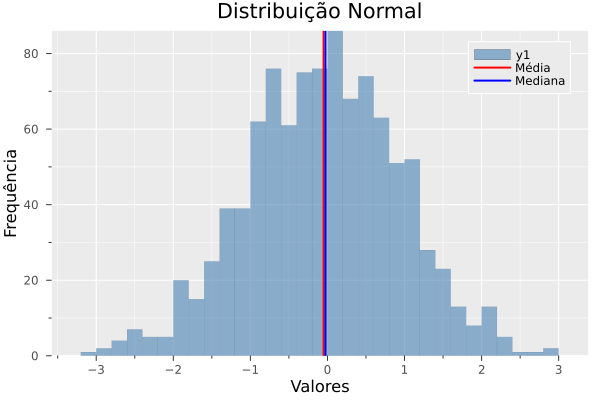

In [15]:
p1 = histogram(dados_normais, bins=30, title="Distribuição Normal", xlabel="Valores", ylabel="Frequência", color=:steelblue, alpha=0.6, lw=0, legend=:topright)
vline!(p1, [media_norm], label="Média", color=:red, linewidth=2)
vline!(p1, [mediana_norm], label="Mediana", color=:blue, linewidth=2)

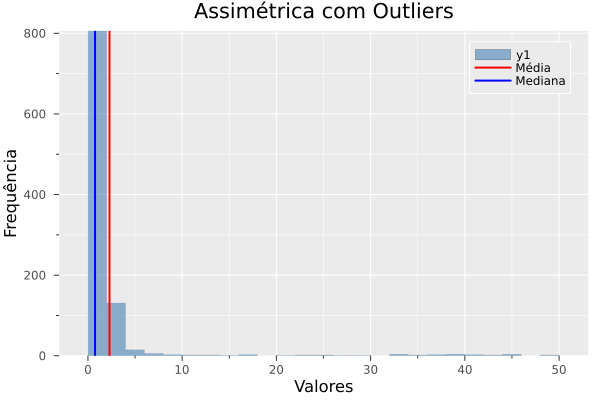

In [16]:
p2 = histogram(dados_assimetricos, bins=30, title="Assimétrica com Outliers", xlabel="Valores", ylabel="Frequência", color=:steelblue, alpha=0.6, lw=0, legend=:topright)
vline!(p2, [media_assim], label="Média", color=:red, linewidth=2)
vline!(p2, [mediana_assim], label="Mediana", color=:blue, linewidth=2)

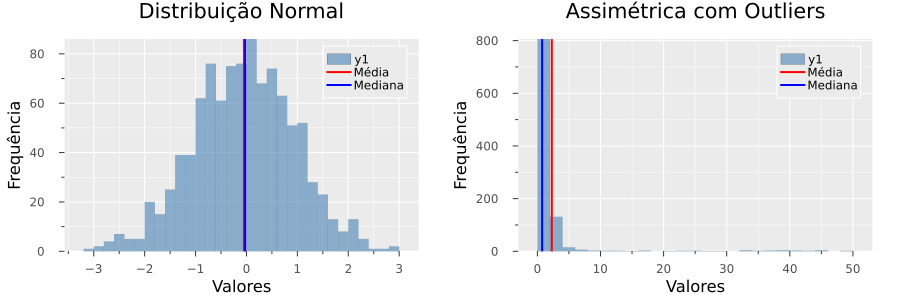

In [17]:
plot(p1, p2, layout=(1,2), size=(900,300), margin=5mm)

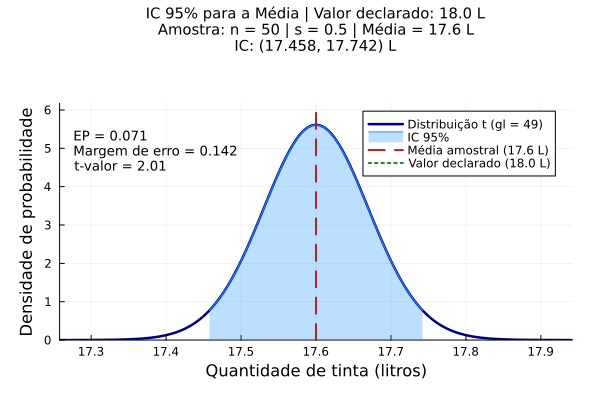


RESULTADOS ESTATÍSTICOS:
----------------------------------------
Média amostral: 17.6 litros
Desvio padrão amostral: 0.5 litros
Erro padrão: 0.0707 litros
t-valor (bilateral): 2.0096
Margem de erro: ±0.1421 litros
Intervalo de Confiança 95% (t-Student): (17.4579 L, 17.7421 L)
Valor declarado: 18 litros
O valor declarado está dentro do IC? NÃO
Estatística t calculada: -5.6569
Valor-p: 0.0
Conclusão: O valor declarado está ACIMA do esperado. A fábrica enche MENOS do que declara.
----------------------------------------


In [37]:
using Distributions, Plots, Statistics, Measures
theme(:wong)

# -------------------------
# 1. Dados e parâmetros
# -------------------------
n = 50
x̄ = 17.6
s = 0.5
μ_declarado = 18
conf_level = 0.95
gl = n - 1

# -------------------------
# 2. Cálculos principais
# -------------------------
EP = s / √n
t_val = quantile(TDist(gl), 1 - (1 - conf_level)/2)
margem_erro = t_val * EP
IC_inf, IC_sup = x̄ - margem_erro, x̄ + margem_erro

# Estatística t calculada para teste de hipótese
t_calc = (x̄ - μ_declarado) / EP
p_valor = 2 * (1 - cdf(TDist(gl), abs(t_calc)))

# -------------------------
# 3. Preparação para o gráfico
# -------------------------
dist = TDist(gl)

# Faixa ajustada dinamicamente
x_range = range(IC_inf - 0.2, IC_sup + 0.2, length=500)
y_values = pdf.(dist, (x_range .- x̄)./EP) ./ EP

# -------------------------
# 4. Criação do gráfico
# -------------------------
p = plot(
    x_range, y_values,
    linewidth = 2.5,
    color = :navyblue,
    label = "Distribuição t (gl = $gl)",
    xlabel = "Quantidade de tinta (litros)",
    ylabel = "Densidade de probabilidade",
    title = "IC 95% para a Média | Valor declarado: $(round(μ_declarado, digits=2)) L\n" *
            "Amostra: n = $n | s = $(round(s, digits=2)) | Média = $(round(x̄, digits=2)) L\n" *
            "IC: ($(round(IC_inf, digits=3)), $(round(IC_sup, digits=3))) L",
    titlefontsize = 10,
    legend = :topright,
    xlims = (minimum(x_range), maximum(x_range)),
    ylims = (0, maximum(y_values)*1.1),
    top_margin = 15mm,
    left_margin = 5mm,
    right_margin = 5mm,
    bottom_margin = 5mm
)

# Área do intervalo de confiança
x_fill = range(IC_inf, IC_sup, length=100)
y_fill = pdf.(dist, (x_fill .- x̄)./EP) ./ EP

plot!(
    x_fill, y_fill, 
    fillrange = 0,
    fillalpha = 0.3,
    color = :dodgerblue,
    label = "IC 95%"
)

# Linhas de referência
vline!([x̄], 
    color = :firebrick, 
    linestyle = :dash, 
    linewidth = 2,
    label = "Média amostral ($(round(x̄, digits=2)) L)"
)

vline!([μ_declarado], 
    color = :forestgreen, 
    linestyle = :dot, 
    linewidth = 2,
    label = "Valor declarado ($(round(μ_declarado, digits=2)) L)"
)

# Anotações
annotate!(minimum(x_range) + 0.02, maximum(y_values)*0.95, 
    text("EP = $(round(EP, digits=3))", :left, 9))
annotate!(minimum(x_range) + 0.02, maximum(y_values)*0.88, 
    text("Margem de erro = $(round(margem_erro, digits=3))", :left, 9))
annotate!(minimum(x_range) + 0.02, maximum(y_values)*0.81, 
    text("t-valor = $(round(t_val, digits=3))", :left, 9))

display(p)

# -------------------------
# 5. Saída numérica
# -------------------------
println("\nRESULTADOS ESTATÍSTICOS:")
println("----------------------------------------")
println("Média amostral: $(round(x̄, digits=4)) litros")
println("Desvio padrão amostral: $(round(s, digits=4)) litros")
println("Erro padrão: $(round(EP, digits=4)) litros")
println("t-valor (bilateral): $(round(t_val, digits=4))")
println("Margem de erro: ±$(round(margem_erro, digits=4)) litros")
println("Intervalo de Confiança 95% (t-Student): ($(round(IC_inf, digits=4)) L, $(round(IC_sup, digits=4)) L)")
println("Valor declarado: $(μ_declarado) litros")

in_IC = μ_declarado ≥ IC_inf && μ_declarado ≤ IC_sup
println("O valor declarado está dentro do IC? $(in_IC ? "SIM" : "NÃO")")

println("Estatística t calculada: $(round(t_calc, digits=4))")
println("Valor-p: $(round(p_valor, digits=4))")

# Conclusão interpretativa
if μ_declarado > IC_sup
    println("Conclusão: O valor declarado está ACIMA do esperado. A fábrica enche MENOS do que declara.")
elseif μ_declarado < IC_inf
    println("Conclusão: O valor declarado está ABAIXO do esperado. A fábrica enche MAIS do que declara.")
else
    println("Conclusão: A fábrica está enchendo DENTRO do esperado.")
end
println("----------------------------------------")
